<a href="https://colab.research.google.com/github/roy-sub/CryptoAnalysis/blob/main/Cryptocurrency%20Price%20Prediction/Bitcoin/Facebook_Prophet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Installing the Necessary Packages**

In [39]:
! pip3 install yfinance
! pip3 install prophet

#**Importing the Necessary Packages**

In [40]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt
import math
import yfinance as yf
from prophet import Prophet
from prophet.diagnostics import cross_validation
from prophet.diagnostics import performance_metrics
from prophet import plot
from IPython.display import display, HTML

#**Downloading the Dataset**

In [41]:
df = yf.download('BTC-USD')

[*********************100%%**********************]  1 of 1 completed


In [42]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100


#**Plotting Stock Closing Prices Over Time**

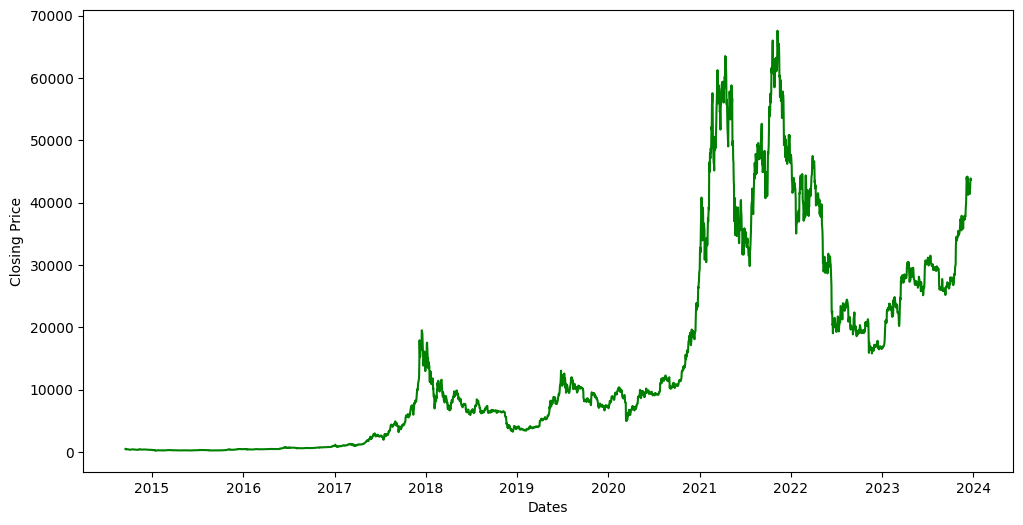

In [43]:
plt.figure(figsize=(12,6))
plt.xlabel("Dates")
plt.ylabel("Closing Price")
plt.plot(df.index, df['Adj Close'], color='green')
plt.show()

#**Resetting the Index and Selecting Relevant Columns in DataFrame**

In [44]:
df.reset_index(inplace=True)
df = df[['Date', 'Adj Close']]
df.head()

,Date,Adj Close
0,2014-09-17,457.334015
1,2014-09-18,424.440002
2,2014-09-19,394.795990
3,2014-09-20,408.903992
4,2014-09-21,398.821014


#**Renaming the Columns**

In [45]:
df.columns = ['ds','y']
df.head()

,ds,y
0,2014-09-17,457.334015
1,2014-09-18,424.440002
2,2014-09-19,394.795990
3,2014-09-20,408.903992
4,2014-09-21,398.821014


#**Training Time Series Forecasting Model using Prophet**

In [46]:
model = Prophet()
model.fit(df)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpb5x7b1t1/ut8id_8p.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpb5x7b1t1/x0qpq1o6.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=57778', 'data', 'file=/tmp/tmpb5x7b1t1/ut8id_8p.json', 'init=/tmp/tmpb5x7b1t1/x0qpq1o6.json', 'output', 'file=/tmp/tmpb5x7b1t1/prophet_modelmgu0c8d7/prophet_model-20231222124410.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:44:10 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:44:11 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


#**Displaying Model Component Modes**

In [47]:
print(f"\nmodel.component_modes : {model.component_modes} \n")


model.component_modes : {'additive': ['yearly', 'weekly', 'additive_terms', 'extra_regressors_additive', 'holidays'], 'multiplicative': ['multiplicative_terms', 'extra_regressors_multiplicative']} 



#**Generating Future Dates for Time Series Forecasting**

In [48]:
df.tail()

,ds,y
3379,2023-12-18,42623.539062
3380,2023-12-19,42270.527344
3381,2023-12-20,43652.250000
3382,2023-12-21,43869.152344
3383,2023-12-22,43646.039062


In [49]:
future_dates = model.make_future_dataframe(periods=60)
future_dates.tail()

,ds
3439,2024-02-16
3440,2024-02-17
3441,2024-02-18
3442,2024-02-19
3443,2024-02-20


#**Time Series Forecasting using Prophet - Predictions**

In [50]:
prediction = model.predict(future_dates)
prediction.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
3439,2024-02-16,24269.004510,19467.526131,32787.536746,23993.782435,24606.759879,1622.972106,1622.972106,1622.972106,6.063321,6.063321,6.063321,1616.908786,1616.908786,1616.908786,0.0,0.0,0.0,25891.976616
3440,2024-02-17,24257.074764,19529.319517,32909.024995,23966.779061,24601.818688,1673.443116,1673.443116,1673.443116,-15.499618,-15.499618,-15.499618,1688.942734,1688.942734,1688.942734,0.0,0.0,0.0,25930.517880
3441,2024-02-18,24245.145018,19213.724588,32180.263988,23928.178000,24596.041324,1731.235005,1731.235005,1731.235005,-15.723508,-15.723508,-15.723508,1746.958513,1746.958513,1746.958513,0.0,0.0,0.0,25976.380022
3442,2024-02-19,24233.215272,19334.800903,32395.164607,23892.202273,24590.513342,1787.268875,1787.268875,1787.268875,-3.205882,-3.205882,-3.205882,1790.474758,1790.474758,1790.474758,0.0,0.0,0.0,26020.484147
3443,2024-02-20,24221.285526,18468.194604,32577.739620,23864.224778,24576.001735,1818.327226,1818.327226,1818.327226,-1.014812,-1.014812,-1.014812,1819.342038,1819.342038,1819.342038,0.0,0.0,0.0,26039.612752


#**Prophet Model - Time Series Forecasting Plot**

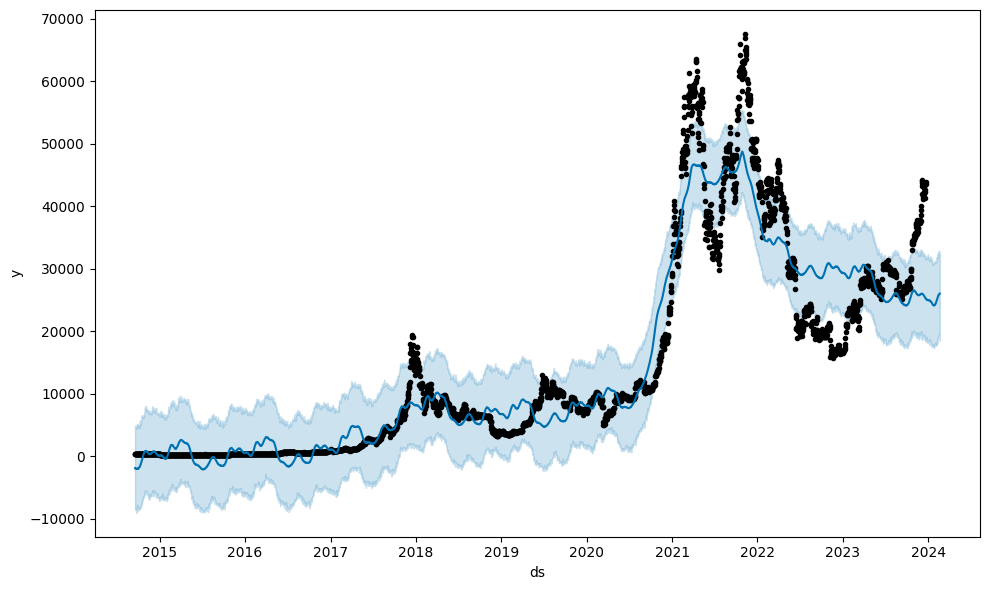

In [51]:
fig1 = model.plot(prediction)
ax = fig1.gca()
ax.grid(False)
plt.show()

#**Prophet Model - Component-wise Analysis Plot**

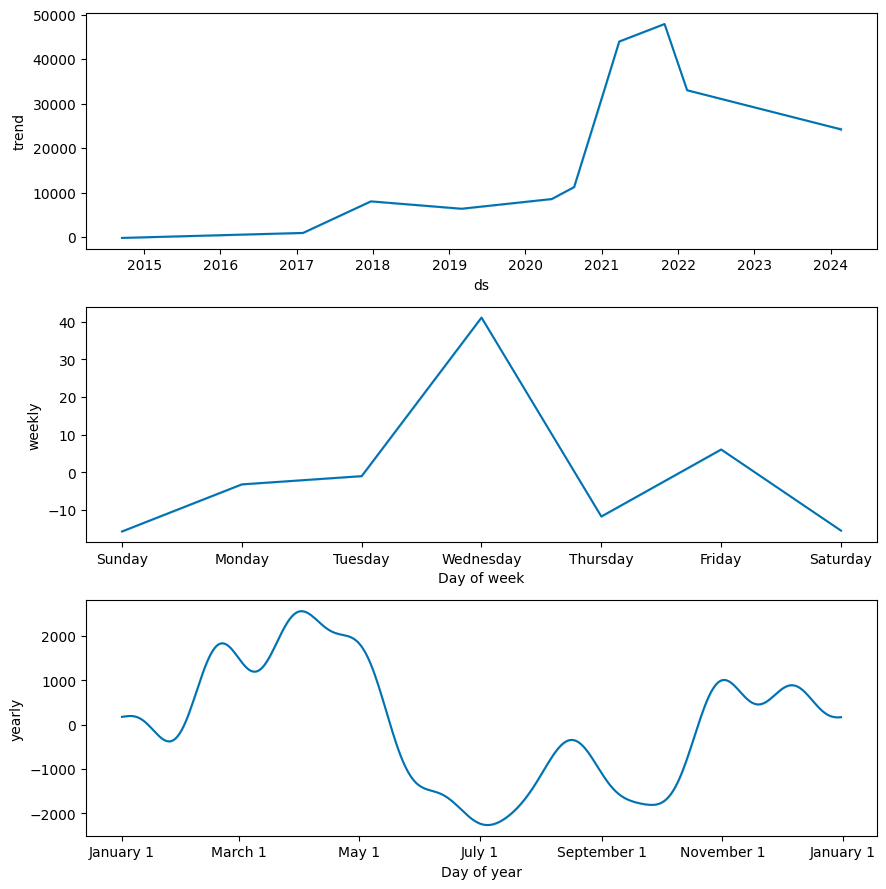

In [52]:
fig2 = model.plot_components(prediction)

for ax in fig2.axes:
    ax.grid(False)

plt.show()

#**Cross-Validation of Prophet Model**

In [57]:
df_cv = cross_validation(model, horizon = '60 days')

INFO:prophet:Making 99 forecasts with cutoffs between 2015-10-05 00:00:00 and 2023-10-23 00:00:00


  0%|          | 0/99 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpb5x7b1t1/djup1dep.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpb5x7b1t1/6ba5kzwl.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=11105', 'data', 'file=/tmp/tmpb5x7b1t1/djup1dep.json', 'init=/tmp/tmpb5x7b1t1/6ba5kzwl.json', 'output', 'file=/tmp/tmpb5x7b1t1/prophet_modelay3r9zn6/prophet_model-20231222125243.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:52:43 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:52:43 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpb5x7b1t1/5uwujx03.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpb5x7b1t1/oxu14_ss.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

In [59]:
df_cv.tail()

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
5935,2023-12-18,15529.100775,8307.322978,22626.231638,42623.539062,2023-10-23
5936,2023-12-19,15509.654485,8373.887870,22343.157965,42270.527344,2023-10-23
5937,2023-12-20,15553.656364,8396.450373,22307.263472,43652.250000,2023-10-23
5938,2023-12-21,15532.147810,8386.972423,22796.117679,43869.152344,2023-10-23
5939,2023-12-22,15582.768192,8953.894298,22751.938671,43646.039062,2023-10-23


#**Prophet Model Performance Metrics**

In [62]:
from prophet.diagnostics import performance_metrics

df_performance = performance_metrics(df_cv)
df_performance.head()

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,6 days,8.466268e+07,9201.232402,5615.531653,0.268475,0.207359,0.269360,0.286195
1,7 days,8.826533e+07,9394.963248,5726.015938,0.273920,0.214543,0.275684,0.286195
2,8 days,9.093693e+07,9536.085896,5820.853473,0.279237,0.218457,0.281403,0.272727
3,9 days,9.305363e+07,9646.430849,5884.853133,0.283818,0.225598,0.286531,0.264310
4,10 days,9.553805e+07,9774.356605,5961.968456,0.288387,0.229805,0.291372,0.259259


#**Prophet Model Cross-Validation MAPE (Mean Absolute Percentage Error) Plot**

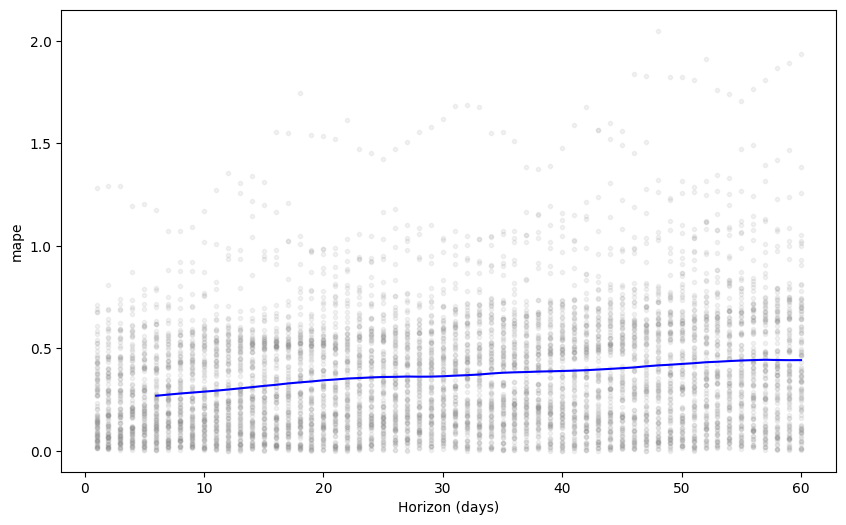

In [61]:
fig3 = plot.plot_cross_validation_metric(df_cv, metric = 'mape')
ax = fig3.gca()
ax.grid(False)